In [2]:
# ALGORITOMO GENETICO 8 REINAS

# IMPORTS
import matplotlib.pyplot as plt
import random
import numpy
from datetime import datetime
from math import e

In [3]:
# CONSTANTES
reinas = 8
porcentajeMutacion = 0.05
porcentajeCruza = 0.5
generaciones = 18       #15 reinas 60 
generacionInicial = 80  #15 reinas 30

In [4]:
# FUNCION DE APTITUD O FIRNESS

# A numero mas bajo de aptitud, mejor es el cromosoma

def aptitud(cromosoma):
    
    size = len(cromosoma)
    
    # Los ataques sólo pueden ser en las diagonales
    diagonal_izquierda_derecha = [0] * (2*size-1)
    diagonal_derecha_izquierda = [0] * (2*size-1)
    horizontal = [0] * size
    
    # Número de reinas en cada diagonal
    for i in range(size): # recorremos las columnas
        diagonal_izquierda_derecha[i+cromosoma[i]] += 1 # [columna + fila]
        diagonal_derecha_izquierda[size-1-i+cromosoma[i]] += 1 # [size-1-columna+ fila]
        horizontal[cromosoma[i]] += 1 
    
    # Número de ataques en cada diagonal
    suma = 0
    for i in range(2*size-1): # recorremos todas las diagonales
        if diagonal_izquierda_derecha[i] > 1: # hay ataques
            suma += diagonal_izquierda_derecha[i] - 1 # n-1 ataques
        if diagonal_derecha_izquierda[i] > 1:
            suma += diagonal_derecha_izquierda[i] - 1
    
    # Numero de ataques en las horizontales
    for i in range(size):
        if horizontal[i] > 1:
            suma += horizontal[i]
           
    return suma

In [5]:
# CRUZA

def cruza(padre, madre):
    
    corte = random.randint(1,reinas-2)
    
    hijo1 = padre[corte:] + madre[:corte]
    hijo2 = madre[corte:] + padre[:corte]
    
    return hijo1, hijo2

In [6]:
# MUTACION

def mutar(genoma):
    
    m = random.random()
    
    if(m < porcentajeMutacion):
        
        i = random.randint(0,reinas-1)
        
        fila = random.randint(0, reinas-1)
        
        while(fila == genoma[i]):
            fila = random.randint(0, reinas-1)
           
        genoma[i] = fila
    
    return genoma

In [7]:
# INICIAR GENOMA RANDOM

def inicializarRandom():
    
    cromosoma = []
    
    for i in range(reinas):
    
        pos = random.randint(0, reinas-1)
        
        cromosoma.append(pos)
    
    return cromosoma

In [8]:
# Funcion que va a retornar el segundo valor de un array para poder ordenar la poblacion por fitness

def segundo(val):
    return val[1]

In [9]:
def aptitudPromedio(poblacion):

    ac = 0

    for i in range(len(poblacion)):
        ac += poblacion[i][1]
    
    return ac/len(poblacion)

In [10]:
def aptitudMinima(poblacion):

    min = poblacion[0][1]

    for i in range(1, len(poblacion)):

        if(min > poblacion[i][1]):

            min = poblacion[i][1]
    
    return min

In [26]:
# SELECCINAR MAS APTOS

# lo que voy a hacer es ir decrementando el learning rate...

def seleccion(poblacion, lr):
    
    for j in range(generaciones):    
        
        # cruzas y mutaciones
        for i in range(0, len(poblacion)):
            
            c = random.random()
            # cruzo?
            if(c < porcentajeCruza):
                
                # selecciono un padre y una madre al azar
                padre = random.randint(0, len(poblacion)-1)
                madre = random.randint(0, len(poblacion)-1)

                # hago la cruza
                h1, h2 = cruza(poblacion[padre][0], poblacion[madre][0])

                # hago la mutacion
                h1 = mutar(h1)
                h2 = mutar(h2)
                
                # agrego los hijos a la poblacion con su respectivo fitness
                ind1 = []
                ind2 = []
                ind1.append(h1)
                ind1.append(aptitud(h1))
                ind2.append(h2)
                ind2.append(aptitud(h2))
                
                poblacion.append(ind1)
                poblacion.append(ind2)
        
        # Ordenamos la poblacion por fitness y recortamos la poblacion a 80
        poblacion.sort(key=segundo)
        poblacion = poblacion[:generacionInicial]
        
        # decremento el lr
        if(j%5 == 0): 
            # Imprimo informacion util
            print( 
                ".  Generacion " + str(j) + 
                ",  Aptitud minima = " + str(aptitudMinima(poblacion)) + 
                ",  Aptitud promedio = " + str(round(aptitudPromedio(poblacion))) + 
                ",  Tamaño de poblacion = " + str(len(poblacion))
            )
    
    # Por ultimo tengo que ordenar nuevamenente la poblacion y recortarla a 80
    poblacion.sort(key=segundo)
    poblacion = poblacion[:generacionInicial]  
    
    # Imprimo informacion util
    print( 
        ".  Generacion " + str(generaciones) + 
        ",  Aptitud minima = " + str(aptitudMinima(poblacion)) + 
        ",  Aptitud promedio = " + str(round(aptitudPromedio(poblacion))) + 
        ",  Tamaño de poblacion = " + str(len(poblacion))
    )

    return poblacion

In [13]:
# IMPRIMIR TABLERO

def imprimirTablero(individuo):
    
    x = range(len(individuo[0]))
    x = numpy.array(x)
    
    y = numpy.array(individuo[0])
    
    x = x + 0.5
    y = y + 0.5
    plt.figure()
    plt.scatter(x, y)
    plt.xlim(0, reinas)
    plt.ylim(0, reinas)
    plt.xticks(x-0.5)
    plt.yticks(x-0.5)
    plt.grid(True)
    plt.title("Individuo " + str(individuo[0]) + " - Aptitud: " + str(individuo[1]))
    plt.show()

In [14]:
# FUNCION PARA EJECUTAR TODO

def iniciar():
    
    # INICIO DEL PROGRAMA ALEATORIO

    poblacion = []

    # armo la poblacion inicial randomicamente
    for i in range(generacionInicial): 
        individuo = []
        individuo.append(inicializarRandom())
        individuo.append(aptitud(individuo[0]))

        poblacion.append(individuo)

    # aca empieza a trabajar el AG
    instanteInicial = datetime.now() # inicio un cronometro

    res = seleccion(poblacion, lr)
    
    instanteFinal = datetime.now() # finalizo el cronometro
    
    tiempo = instanteFinal - instanteInicial # Devuelve un objeto timedelta
    segundos = tiempo.seconds  
    print()
    print("8 mejores individuos obtenidos en " + str(segundos) + " segundos")
    
    # Recorto la poblacion para quedarme con los 8 mejores
    res = res[:reinas]
    
    for i in range(len(res)):
        
        imprimirTablero(res[i])

.  Generacion 0,  Aptitud minima = 3,  Aptitud promedio = 7,  Tamaño de poblacion = 80
.  Generacion 5,  Aptitud minima = 2,  Aptitud promedio = 5,  Tamaño de poblacion = 80
.  Generacion 10,  Aptitud minima = 1,  Aptitud promedio = 4,  Tamaño de poblacion = 80
.  Generacion 15,  Aptitud minima = 0,  Aptitud promedio = 3,  Tamaño de poblacion = 80
.  Generacion 18,  Aptitud minima = 0,  Aptitud promedio = 3,  Tamaño de poblacion = 80

8 mejores individuos obtenidos en 0 segundos


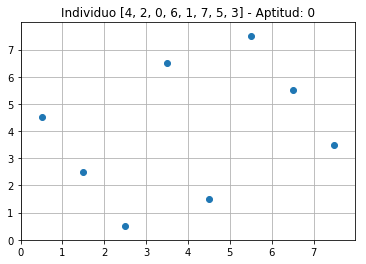

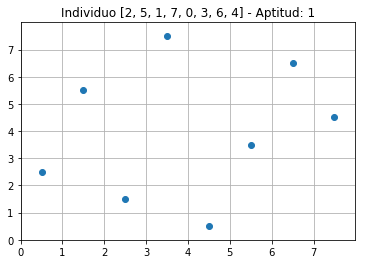

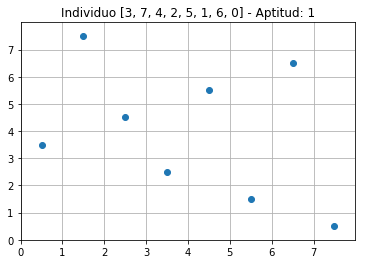

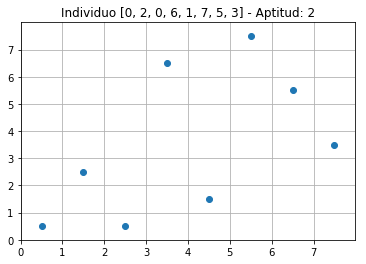

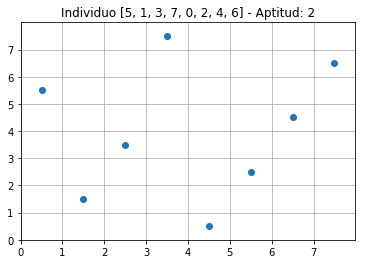

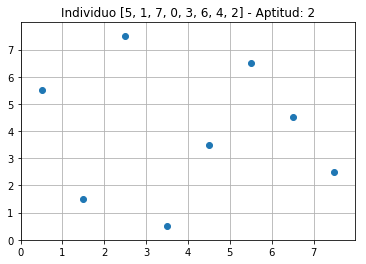

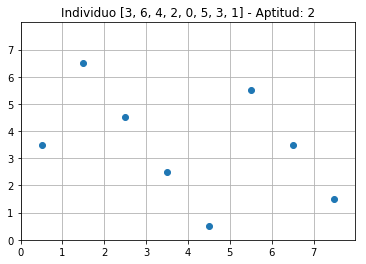

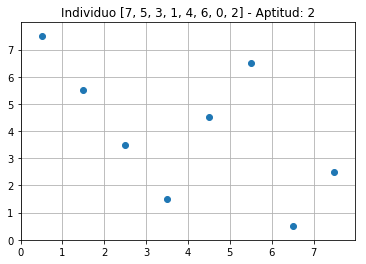

In [33]:
# LLAMANDO AL PROGRAMA INICIAL

iniciar()